In [1]:
# Load packages
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.local_polynomial import LocalPolynomial
from FDApy.bandwidth import Bandwidth
from FDApy.basis import *
from FDApy.plot import *
from FDApy.utils import *

# Generate IrregularFunctionalData 

In [2]:
argvals = list()
values = list()
for i in np.arange(1000):
    M = np.random.randint(275, 325)
    simu = Brownian(N=1, M=M, brownian_type='fractional')
    simu.new(x0=0, hurst=0.5)
    argvals.append(simu.obs_.argvals[0])
    noise = np.random.normal(0, 0.1, size=len(simu.obs_.argvals[0]))
    values.append(simu.obs_.values[0] + noise)

In [3]:
irr_fun = IrregularFunctionalData(argvals, values)
irr_fun

Irregular Functional data objects with 1000 observations of 1-dimensional support
argvals:
	Values in 0.0 ... 1.0.
values:
	Values in -3.2727215259749607 ... 3.736823900437194.
There are 275 - 324 sampling points per observation.

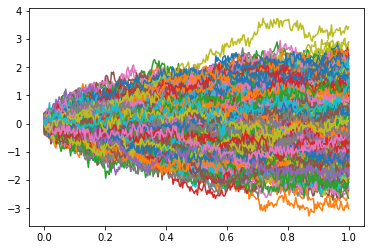

In [4]:
plot(irr_fun)
plt.show()

In [5]:
irr_fun_smooth = irr_fun.smooth(t0=0.5, k0=14)

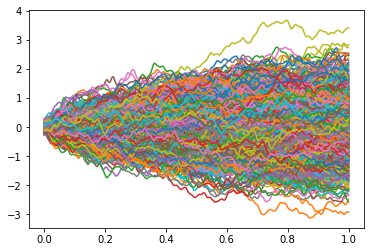

In [6]:
plot(irr_fun_smooth)
plt.show()

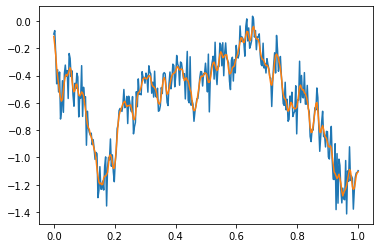

In [7]:
# Plot individual curves
idx = 5
fig, ax = plt.subplots(1, 1)
ax.plot(irr_fun.argvals[idx], irr_fun.values[idx])
ax.plot(irr_fun_smooth.argvals[idx], irr_fun_smooth.values[idx])
plt.show()